In [4]:
from dataset import XinguDataset
from onehotencoding import OneHotEncoding
import albumentations as A
import matplotlib.pyplot as plt

In [5]:
encoder = OneHotEncoding(3)
ds = XinguDataset('scenes_allbands', 'truth_masks', encoder, [7, 6, 4], range(1, 11), 256)

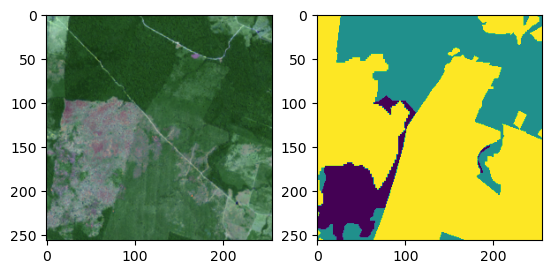

In [9]:
image, mask = ds.__getitem__(15)
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(image.transpose(1, 2, 0))
ax[1].imshow(encoder.decode(mask))

In [60]:
transforms = A.Compose([
    A.HorizontalFlip(p=1), A.VerticalFlip(p=0), A.Rotate(limit=40, p=1)
], p=1)

In [64]:
transformed = transforms(image=image.transpose(1, 2, 0), mask=mask)
image_trans = transformed['image']
mask_trans = transformed['mask']

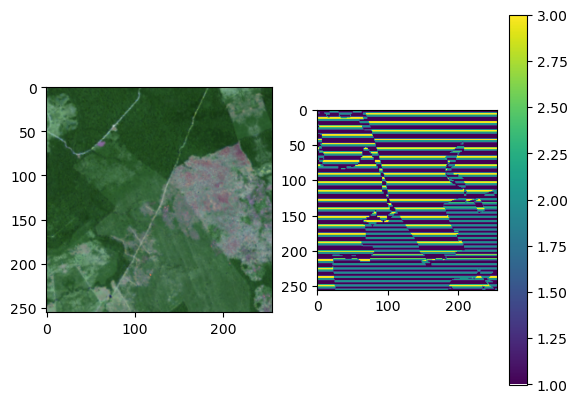

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(image_trans)
mskplot = ax[1].imshow(encoder.decode(mask_trans))
fig.colorbar(mskplot)